In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import PIL.Image as img
import numpy as np

In [7]:
import pathlib
path = pathlib.Path('./')
names = list(path.glob('./*'))

In [8]:
names

[WindowsPath('patch_place.ipynb'),
 WindowsPath('RoadSceneFusion'),
 WindowsPath('show_RS'),
 WindowsPath('show_TNO'),
 WindowsPath('TNO')]

In [33]:
def patch_place(name, show=False):
    global i, pos, h_pad, w_pad, factor, place_ang, lw, color, save
    
    if i.ndim == 2 or i.shape[2] == 1:
        i = i.reshape(i.shape[0], i.shape[1], 1)
        i = np.repeat(i, 3, axis=-1)
    
    f_i = (i[pos[1]:pos[1]+h_pad, pos[0]:pos[0]+w_pad]).copy()
    i = cv2.rectangle(i, tuple(pos), tuple(pos+np.array([w_pad,h_pad])), color, lw)
    f_i = cv2.resize(f_i, (int(f_i.shape[1]*factor), int(f_i.shape[0]*factor)), interpolation=cv2.INTER_CUBIC)
    f_i = cv2.rectangle(f_i, (0,0), (f_i.shape[1],f_i.shape[0]), color, int(lw*factor))
    if place_ang == 'lt':
        i[:f_i.shape[0], :f_i.shape[1]] = f_i
    elif place_ang == 'lb':
        i[-f_i.shape[0]:, :f_i.shape[1]] = f_i
    elif place_ang == 'rt':
        i[:f_i.shape[0], -f_i.shape[1]:] = f_i
    elif place_ang == 'rb':
        i[-f_i.shape[0]:, -f_i.shape[1]:] = f_i

    if show:
        fig, axes = plt.subplots(figsize=(8, 8))
        plt.imshow(i, 'gray')
        # plt.title(name)
        axes.set_axis_off()
        # plt.show()
    
    if save and show:
        plt.tight_layout()
        fig.savefig(f'./{str(name)}.png', bbox_inches='tight', pad_inches=0, dpi=200)
    
    return i

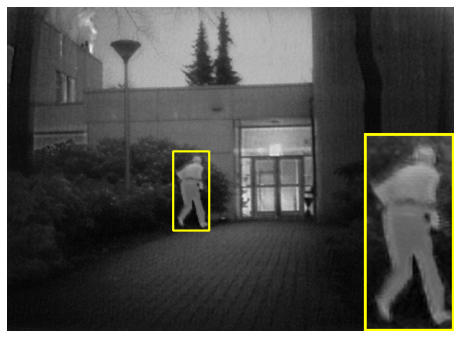

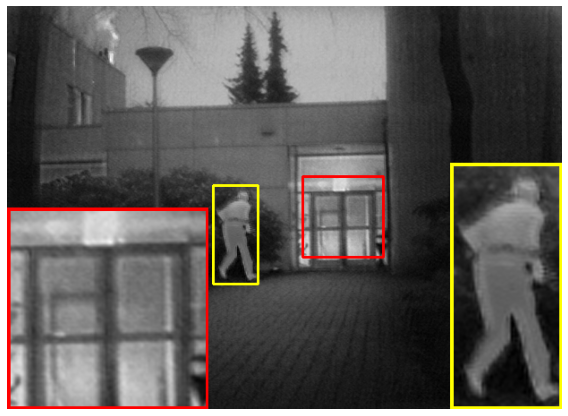

In [34]:
names =  [
            # 'test/ir', 'test/vi',
            # 'DDcGAN_500_optim_205', 'defuse'
            'LRRNet'
        #   'u2fusion',
        #   'densefuse', 'dcformer_RS_TNO_u2fusion_loss_wx_new',
        #   'ifcnn', 'GTF', 'NSST', 'swinFuse', 'SwinFusion',
        #   'ydtr'
          ]
        #  'dcformer_u2fusion_5_2_10_TNO',
        #  'DenseFuse_TNO',
        #  'GTF', 'NSST', 'IFCNN_TNO',
        #  'DDcGAN', 'new_U2Fusion_300', 'ydtr_TNO', 'defuse', 'SwinFuse',
        #  'SwinFusion']

for name in names:
    index = 17 #13
    if name == 'GTF':
        index = 5
    
    try:
        i = img.open(f'TNO/{name}/{index}.png')  # TNO: 17
    except:
        i = img.open(f'TNO/{name}/{index}.bmp')
    i = np.array(i)

    pos = [230, 200]#[185, 80]
    h_pad=110
    w_pad=50
    factor=2.5
    place_ang = 'rb'
    lw = 2
    color = (255,255,0)
    save = False

    # for n in names:
    #     i = img.open(f'./{n}/8_{n}.png')
    #     i = np.array(i)
    #     patch_place(n)

    i = patch_place('', show=True)

    pos = [330, 190]
    h_pad=90 #30
    w_pad=90 #40
    factor=2.5
    place_ang = 'lb'
    color = (255,0,0)
    save = True

    _ = patch_place(name.replace('/', '_'), show=True)
